# PredictStudentsDropoutAndAcademicSuccess

# Polytechnic Institute of Portalegre

### TableOfContents

* [Initialization](#Initialization)

* [RandomForest](#RandomForest)

* [Next](#Next)

# Initialization
[BackToTop](#PredictStudentsDropoutAndAcademicSuccess)

In [23]:
#import
#--------------------------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import (GridSearchCV,
    train_test_split)

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score)

#--------------------------------------------------

#global constants
#--------------------------------------------------

#--------------------------------------------------

#load csv
#--------------------------------------------------
DF = pd.read_csv("PredictStudentsDropoutAndAcademicSuccess.csv", sep=";")
#--------------------------------------------------

#data mapping
#--------------------------------------------------
# Function to convert col to camelCase
conversion_dict = {
    "Marital status": "maritalStatus",
    "Application mode": "applicationMode",
    "Application order": "applicationOrder",
    "Course": "course",
    "Daytime/evening attendance": "daytimeEveningAttendance",
    "Previous qualification": "previousQualification",
    "Previous qualification (grade)": "previousQualificationGrade",
    "Nacionality": "nationality",
    "Mothers qualification": "motherQualification",
    "Fathers qualification": "fatherQualification",
    "Mothers occupation": "motherOccupation",
    "Fathers occupation": "fatherOccupation",
    "Admission grade": "admissionGrade",
    "Displaced": "displaced",
    "Educational special needs": "educationalSpecialNeeds",
    "Debtor": "debtor",
    "Tuition fees up to date": "tuitionFeesUpToDate",
    "Gender": "gender",
    "Scholarship holder": "scholarshipHolder",
    "Age at enrollment": "ageAtEnrollment",
    "International": "international",
    "Curricular units 1st sem (credited)": "curricularUnits1stSemCredited",
    "Curricular units 1st sem (enrolled)": "curricularUnits1stSemEnrolled",
    "Curricular units 1st sem (evaluations)": "curricularUnits1stSemEvaluations",
    "Curricular units 1st sem (approved)": "curricularUnits1stSemApproved",
    "Curricular units 1st sem (grade)": "curricularUnits1stSemGrade",
    "Curricular units 1st sem (without evaluations)": "curricularUnits1stSemWithoutEvaluations",
    "Curricular units 2nd sem (credited)": "curricularUnits2ndSemCredited",
    "Curricular units 2nd sem (enrolled)": "curricularUnits2ndSemEnrolled",
    "Curricular units 2nd sem (evaluations)": "curricularUnits2ndSemEvaluations",
    "Curricular units 2nd sem (approved)": "curricularUnits2ndSemApproved",
    "Curricular units 2nd sem (grade)": "curricularUnits2ndSemGrade",
    "Curricular units 2nd sem (without evaluations)": "curricularUnits2ndSemWithoutEvaluations",
    "Unemployment rate": "unemploymentRate",
    "Inflation rate": "inflationRate",
    "GDP": "gdp",
    "Target": "target"
}

# Marital Status
maritalStatus = {
    1: "single",
    2: "married",
    3: "widower",
    4: "divorced",
    5: "facto union",
    6: "legally separated"
}

# Application Mode
applicationMode = {
    1: "1st phase - general contingent",
    2: "Ordinance No. 612/93",
    5: "1st phase - special contingent (Azores Island)",
    7: "Holders of other higher courses",
    10: "Ordinance No. 854-B/99",
    15: "International student (bachelor)",
    16: "1st phase - special contingent (Madeira Island)",
    17: "2nd phase - general contingent",
    18: "3rd phase - general contingent",
    26: "Ordinance No. 533-A/99, item b2) (Different Plan)",
    27: "Ordinance No. 533-A/99, item b3 (Other Institution)",
    39: "Over 23 years old",
    42: "Transfer",
    43: "Change of course",
    44: "Technological specialization diploma holders",
    51: "Change of institution/course",
    53: "Short cycle diploma holders",
    57: "Change of institution/course (International)"
}

# Course
course = {
    33: "Biofuel Production Technologies",
    171: "Animation and Multimedia Design",
    8014: "Social Service (evening attendance)",
    9003: "Agronomy",
    9070: "Communication Design",
    9085: "Veterinary Nursing",
    9119: "Informatics Engineering",
    9130: "Equinculture",
    9147: "Management",
    9238: "Social Service",
    9254: "Tourism",
    9500: "Nursing",
    9556: "Oral Hygiene",
    9670: "Advertising and Marketing Management",
    9773: "Journalism and Communication",
    9853: "Basic Education",
    9991: "Management (evening attendance)"
}

# Nationality
nationality = {
    1: "Portuguese",
    2: "German",
    6: "Spanish",
    11: "Italian",
    13: "Dutch",
    14: "English",
    17: "Lithuanian",
    21: "Angolan",
    22: "Cape Verdean",
    24: "Guinean",
    25: "Mozambican",
    26: "Santomean",
    32: "Turkish",
    41: "Brazilian",
    62: "Romanian",
    100: "Moldova (Republic of)",
    101: "Mexican",
    103: "Ukrainian",
    105: "Russian",
    108: "Cuban",
    109: "Colombian"
}

# Binary attributes
daytimeEveningAttendance = {1: "daytime", 0: "evening"}
displaced = {1: "yes", 0: "no"}
educationalSpecialNeeds = {1: "yes", 0: "no"}
debtor = {1: "yes", 0: "no"}
tuitionFeesUpToDate = {1: "yes", 0: "no"}
gender = {1: "male", 0: "female"}
scholarshipHolder = {1: "yes", 0: "no"}
international = {1: "yes", 0: "no"}

# Sample dictionary to map macro data triplets to a year
econ_to_year = {
    (10.8, 1.4, 1.74): 2010,
    (13.9, -0.3, 0.79): 2011,
    (9.4, -0.8, -3.12): 2012,
    (16.2, 0.3, -0.92): 2013,
    (15.5, 2.8, -4.06): 2014,
    (8.9, 1.4, 3.51): 2015,
    (12.7, 3.7, -1.70): 2016,
    (11.1, 0.6, 2.02): 2017,
    (7.6, 2.6, 0.32): 2018,
    (12.4, 0.5, 1.79): 2019
}

# Target
targetMap = {
    "Dropout": 0,
    "Enrolled": 1,
    "Graduate": 2,
}

targetMapReverse = {v: k for k, v in targetMap.items()}

# Previous Qualification
previousQualification = {
    1: "Secondary education",
    2: "Higher education - bachelor's degree",
    3: "Higher education - degree",
    4: "Higher education - master's",
    5: "Higher education - doctorate",
    6: "Frequency of higher education",
    9: "12th year of schooling - not completed",
    10: "11th year of schooling - not completed",
    12: "Other - 11th year of schooling",
    14: "10th year of schooling",
    15: "10th year of schooling - not completed",
    19: "Basic education 3rd cycle (9th/10th/11th year) or equiv.",
    38: "Basic education 2nd cycle (6th/7th/8th year) or equiv.",
    39: "Technological specialization course",
    40: "Higher education - degree (1st cycle)",
    42: "Professional higher technical course",
    43: "Higher education - master (2nd cycle)"
}

# Mother's Qualification
motherQualification = {
    1: "Secondary Education - 12th Year of Schooling or Eq.",
    2: "Higher Education - Bachelor's Degree",
    3: "Higher Education - Degree",
    4: "Higher Education - Master's",
    5: "Higher Education - Doctorate",
    6: "Frequency of Higher Education",
    9: "12th Year of Schooling - Not Completed",
    10: "11th Year of Schooling - Not Completed",
    11: "7th Year (Old)",
    12: "Other - 11th Year of Schooling",
    14: "10th Year of Schooling",
    18: "General commerce course",
    19: "Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv.",
    22: "Technical-professional course",
    26: "7th year of schooling",
    27: "2nd cycle of the general high school course",
    29: "9th Year of Schooling - Not Completed",
    30: "8th year of schooling",
    34: "Unknown",
    35: "Can't read or write",
    36: "Can read without having a 4th year of schooling",
    37: "Basic education 1st cycle (4th/5th year) or equiv.",
    38: "Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv.",
    39: "Technological specialization course",
    40: "Higher education - degree (1st cycle)",
    41: "Specialized higher studies course",
    42: "Professional higher technical course",
    43: "Higher Education - Master (2nd cycle)",
    44: "Higher Education - Doctorate (3rd cycle)"
}

# Father's Qualification
fatherQualification = {
    1: "Secondary Education - 12th Year of Schooling or Eq.",
    2: "Higher Education - Bachelor's Degree",
    3: "Higher Education - Degree",
    4: "Higher Education - Master's",
    5: "Higher Education - Doctorate",
    6: "Frequency of Higher Education",
    9: "12th Year of Schooling - Not Completed",
    10: "11th Year of Schooling - Not Completed",
    11: "7th Year (Old)",
    12: "Other - 11th Year of Schooling",
    13: "2nd year complementary high school course",
    14: "10th Year of Schooling",
    18: "General commerce course",
    19: "Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv.",
    20: "Complementary High School Course",
    22: "Technical-professional course",
    25: "Complementary High School Course - not concluded",
    26: "7th year of schooling",
    27: "2nd cycle of the general high school course",
    29: "9th Year of Schooling - Not Completed",
    30: "8th year of schooling",
    31: "General Course of Administration and Commerce",
    33: "Supplementary Accounting and Administration",
    34: "Unknown",
    35: "Can't read or write",
    36: "Can read without having a 4th year of schooling",
    37: "Basic education 1st cycle (4th/5th year) or equiv.",
    38: "Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv.",
    39: "Technological specialization course",
    40: "Higher education - degree (1st cycle)",
    41: "Specialized higher studies course",
    42: "Professional higher technical course",
    43: "Higher Education - Master (2nd cycle)",
    44: "Higher Education - Doctorate (3rd cycle)"
}

# Combine Qualification
combineQualification = {
    1: "Secondary Education - 12th Year of Schooling or Eq.",
    2: "Higher Education - Bachelor's Degree",
    3: "Higher Education - Degree",
    4: "Higher Education - Master's",
    5: "Higher Education - Doctorate",
    6: "Frequency of Higher Education",
    9: "12th Year of Schooling - Not Completed",
    10: "11th Year of Schooling - Not Completed",
    11: "7th Year (Old)",
    12: "Other - 11th Year of Schooling",
    13: "2nd year complementary high school course",
    14: "10th Year of Schooling",
    15: "10th Year of Schooling - Not Completed",
    18: "General commerce course",
    19: "Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv.",
    20: "Complementary High School Course",
    22: "Technical-professional course",
    25: "Complementary High School Course - not concluded",
    26: "7th year of schooling",
    27: "2nd cycle of the general high school course",
    29: "9th Year of Schooling - Not Completed",
    30: "8th year of schooling",
    31: "General Course of Administration and Commerce",
    33: "Supplementary Accounting and Administration",
    34: "Unknown",
    35: "Can't read or write",
    36: "Can read without having a 4th year of schooling",
    37: "Basic education 1st cycle (4th/5th year) or equiv.",
    38: "Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv.",
    39: "Technological specialization course",
    40: "Higher education - degree (1st cycle)",
    41: "Specialized higher studies course",
    42: "Professional higher technical course",
    43: "Higher Education - Master (2nd cycle)",
    44: "Higher Education - Doctorate (3rd cycle)"
}

# Ordinal grouping mapping
qualificationOrdinal = {
    **{code: 0 for code in [34, 35]}, #No documented education
    **{code: 1 for code in [11, 12, 26, 27, 29, 30, 31, 37, 38, 36]}, #Basic/primary schooling
    **{code: 2 for code in [9, 10, 14, 15, 13, 18, 20, 22, 25, 19, 33, 41]}, #Interrupted or completed
    **{code: 3 for code in [39, 42]}, #Technological or sub-degree
    **{code: 4 for code in [1, 2, 3, 40, 4, 43, 5, 44, 6]} #Degree and beyond
}

# Ordinal grouping mapping name
qualificationOrdinalName = {
    0: "None. No documented education",
    1: "Basic. Basic/primary schooling",
    2: "Secondary. Interrupted or completed",
    3: "Post-Secondary. Technological or sub-degree",
    4: "Higher Ed. Degree and beyond",
}

# Mother's Occupation
motherOccupation = {
    0: "Student",
    1: "Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers",
    2: "Specialists in Intellectual and Scientific Activities",
    3: "Intermediate Level Technicians and Professions",
    4: "Administrative staff",
    5: "Personal Services, Security and Safety Workers and Sellers",
    6: "Farmers and Skilled Workers in Agriculture, Fisheries and Forestry",
    7: "Skilled Workers in Industry, Construction and Craftsmen",
    8: "Installation and Machine Operators and Assembly Workers",
    9: "Unskilled Workers",
    10: "Armed Forces Professions",
    90: "Other Situation",
    99: "(blank)",
    122: "Health professionals",
    123: "teachers",
    125: "Specialists in information and communication technologies (ICT)",
    131: "Intermediate level science and engineering technicians and professions",
    132: "Technicians and professionals, of intermediate level of health",
    134: "Intermediate level technicians from legal, social, sports, cultural and similar services",
    141: "Office workers, secretaries in general and data processing operators",
    143: "Data, accounting, statistical, financial services and registry-related operators",
    144: "Other administrative support staff",
    151: "personal service workers",
    152: "sellers",
    153: "Personal care workers and the like",
    171: "Skilled construction workers and the like, except electricians",
    173: "Skilled workers in printing, precision instrument manufacturing, jewelers, artisans and the like",
    175: "Workers in food processing, woodworking, clothing and other industries and crafts",
    191: "cleaning workers",
    192: "Unskilled workers in agriculture, animal production, fisheries and forestry",
    193: "Unskilled workers in extractive industry, construction, manufacturing and transport",
    194: "Meal preparation assistants"
}

# Father's Occupation
fatherOccupation = {
    0: "Student",
    1: "Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers",
    2: "Specialists in Intellectual and Scientific Activities",
    3: "Intermediate Level Technicians and Professions",
    4: "Administrative staff",
    5: "Personal Services, Security and Safety Workers and Sellers",
    6: "Farmers and Skilled Workers in Agriculture, Fisheries and Forestry",
    7: "Skilled Workers in Industry, Construction and Craftsmen",
    8: "Installation and Machine Operators and Assembly Workers",
    9: "Unskilled Workers",
    10: "Armed Forces Professions",
    90: "Other Situation",
    99: "(blank)",
    101: "Armed Forces Officers",
    102: "Armed Forces Sergeants",
    103: "Other Armed Forces personnel",
    112: "Directors of administrative and commercial services",
    114: "Hotel, catering, trade and other services directors",
    121: "Specialists in the physical sciences, mathematics, engineering and related techniques",
    122: "Health professionals",
    123: "teachers",
    124: "Specialists in finance, accounting, administrative organization, public and commercial relations",
    131: "Intermediate level science and engineering technicians and professions",
    132: "Technicians and professionals, of intermediate level of health",
    134: "Intermediate level technicians from legal, social, sports, cultural and similar services",
    135: "Information and communication technology technicians",
    141: "Office workers, secretaries in general and data processing operators",
    143: "Data, accounting, statistical, financial services and registry-related operators",
    144: "Other administrative support staff",
    151: "personal service workers",
    152: "sellers",
    153: "Personal care workers and the like",
    154: "Protection and security services personnel",
    161: "Market-oriented farmers and skilled agricultural and animal production workers",
    163: "Farmers, livestock keepers, fishermen, hunters and gatherers, subsistence",
    171: "Skilled construction workers and the like, except electricians",
    172: "Skilled workers in metallurgy, metalworking and similar",
    174: "Skilled workers in electricity and electronics",
    175: "Workers in food processing, woodworking, clothing and other industries and crafts",
    181: "Fixed plant and machine operators",
    182: "assembly workers",
    183: "Vehicle drivers and mobile equipment operators",
    192: "Unskilled workers in agriculture, animal production, fisheries and forestry",
    193: "Unskilled workers in extractive industry, construction, manufacturing and transport",
    194: "Meal preparation assistants",
    195: "Street vendors (except food) and street service providers"
}

# Combine Occupation
combineOccupation = {
    0: "Student",
    1: "Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers",
    2: "Specialists in Intellectual and Scientific Activities",
    3: "Intermediate Level Technicians and Professions",
    4: "Administrative staff",
    5: "Personal Services, Security and Safety Workers and Sellers",
    6: "Farmers and Skilled Workers in Agriculture, Fisheries and Forestry",
    7: "Skilled Workers in Industry, Construction and Craftsmen",
    8: "Installation and Machine Operators and Assembly Workers",
    9: "Unskilled Workers",
    10: "Armed Forces Professions",
    90: "Other Situation",
    99: "(blank)",
    101: "Armed Forces Officers",
    102: "Armed Forces Sergeants",
    103: "Other Armed Forces personnel",
    112: "Directors of administrative and commercial services",
    114: "Hotel, catering, trade and other services directors",
    121: "Specialists in the physical sciences, mathematics, engineering and related techniques",
    122: "Health professionals",
    123: "teachers",
    124: "Specialists in finance, accounting, administrative organization, public and commercial relations",
    125: "Specialists in information and communication technologies (ICT)",
    131: "Intermediate level science and engineering technicians and professions",
    132: "Technicians and professionals, of intermediate level of health",
    134: "Intermediate level technicians from legal, social, sports, cultural and similar services",
    135: "Information and communication technology technicians",
    141: "Office workers, secretaries in general and data processing operators",
    143: "Data, accounting, statistical, financial services and registry-related operators",
    144: "Other administrative support staff",
    151: "personal service workers",
    152: "sellers",
    153: "Personal care workers and the like",
    154: "Protection and security services personnel",
    161: "Market-oriented farmers and skilled agricultural and animal production workers",
    163: "Farmers, livestock keepers, fishermen, hunters and gatherers, subsistence",
    171: "Skilled construction workers and the like, except electricians",
    172: "Skilled workers in metallurgy, metalworking and similar",
    173: "Skilled workers in printing, precision instrument manufacturing, jewelers, artisans and the like",
    174: "Skilled workers in electricity and electronics",
    175: "Workers in food processing, woodworking, clothing and other industries and crafts",
    181: "Fixed plant and machine operators",
    182: "assembly workers",
    183: "Vehicle drivers and mobile equipment operators",
    191: "cleaning workers",
    192: "Unskilled workers in agriculture, animal production, fisheries and forestry",
    193: "Unskilled workers in extractive industry, construction, manufacturing and transport",
    194: "Meal preparation assistants",
    195: "Street vendors (except food) and street service providers"
}

# Occupation Income Level
occupationOrdinal = {
    **{code: 0 for code in [0, 90, 99]},
    **{code: 1 for code in [9, 191, 192, 193, 194, 195, 163]},
    **{code: 2 for code in [6, 7, 171, 172, 173, 174, 175, 8, 181, 182, 183, 152, 153, 154, 151]},
    **{code: 3 for code in [3, 131, 132, 134, 135, 4, 141, 143, 144, 5, 10, 101, 102, 103, 161]},
    **{code: 4 for code in [2, 121, 122, 123, 124, 125]},
    **{code: 5 for code in [1, 112, 114]}
}

# Occupation Income Level Name
occupationOrdinalName = {
    0: "None/Unknown",
    1: "Low income",
    2: "Lower-Middle income",
    3: "Middle income",
    4: "Upper-Middle income",
    5: "High income"
}
#--------------------------------------------------

#common functions
#--------------------------------------------------
font = {
    "reset": "\033[0m",
    "bold": "\033[1m",
    "faint": "\033[2m",
    "italic": "\033[3m",
    "underline": "\033[4m",
    "slow_blink": "\033[5m",
    "rapid_blink": "\033[6m",
    "reverse": "\033[7m",
    "conceal": "\033[8m",
    "crossed_out": "\033[9m",

    "bold_off": "\033[22m",
    "italic_off": "\033[23m",
    "underline_off": "\033[24m",
    "blink_off": "\033[25m",
    "reverse_off": "\033[27m",
    "conceal_off": "\033[28m",
    "crossed_out_off": "\033[29m",
}

text_color = {
    "black": "\033[30m",
    "red": "\033[31m",
    "green": "\033[32m",
    "yellow": "\033[33m",
    "blue": "\033[34m",
    "magenta": "\033[35m",
    "cyan": "\033[36m",
    "white": "\033[37m",
    "default": "\033[39m",
}

background_color = {
    "black": "\033[40m",
    "red": "\033[41m",
    "green": "\033[42m",
    "yellow": "\033[43m",
    "blue": "\033[44m",
    "magenta": "\033[45m",
    "cyan": "\033[46m",
    "white": "\033[47m",
    "default": "\033[49m",
}

globalHeader = ""
isHeader = True
def __________section__________(header = globalHeader, width = 50):
    global globalHeader, isHeader
    
    if isHeader:
        bar = ">" * width
        print(text_color["green"] + font["bold"] + "\n" + bar + font["reset"])
        print(text_color["green"] + font["bold"] + f">[SECTION]{header.upper()}" + font["reset"])
        globalHeader = header
        isHeader = False

    else:
        bar = "<" * width
        print(text_color["red"] + font["bold"] + f"<[SECTION]{globalHeader.upper()}" + font["reset"])
        print(text_color["red"] + font["bold"] + bar + "\n" + font["reset"])
        isHeader = True

def _c_(comment, color = "blue"):
    print(text_color[color] + font["italic"] + f"-------[C]{comment.lower()}" + font["reset"])
   
def nanCheck(df):
    _c_("Check how many missing values per column")
    #print(df.isnull().sum())

    _c_("Show only columns that have missing values")
    #print(df.isnull().sum()[df.isnull().sum() > 0])

    _c_("Check if any missing value exists in the entire DataFrame")
    #print(df.isnull().values.any())

    _c_("List all rows that contain any NaN")
    #print(df[df.isnull().any(axis=1)])

# RandomForest
[BackToTop](#PredictStudentsDropoutAndAcademicSuccess)

<[SECTION]
<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<


>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
>[SECTION]
<[SECTION]
<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<

['maritalStatus', 'applicationMode', 'applicationOrder', 'course', 'daytimeEveningAttendance', 'previousQualification', 'previousQualificationGrade', 'nationality', 'motherQualification', 'fatherQualification', 'motherOccupation', 'fatherOccupation', 'admissionGrade', 'displaced', 'educationalSpecialNeeds', 'debtor', 'tuitionFeesUpToDate', 'gender', 'scholarshipHolder', 'ageAtEnrollment', 'international', 'curricularUnits1stSemCredited', 'curricularUnits1stSemEnrolled', 'curricularUnits1stSemEvaluations', 'curricularUnits1stSemApproved', 'curricularUnits1stSemGrade', 'curricularUnits1stSemWithoutEvaluations', 'curricularUnits2ndSemCredited', 'curricularUnits2ndSemEnrolled', 'curricularUnits2ndSemEvaluations', 'curricularUnits2ndSemApproved', 'curricularUnits2ndSemGrade', 'curricularUnits2ndSemWithout

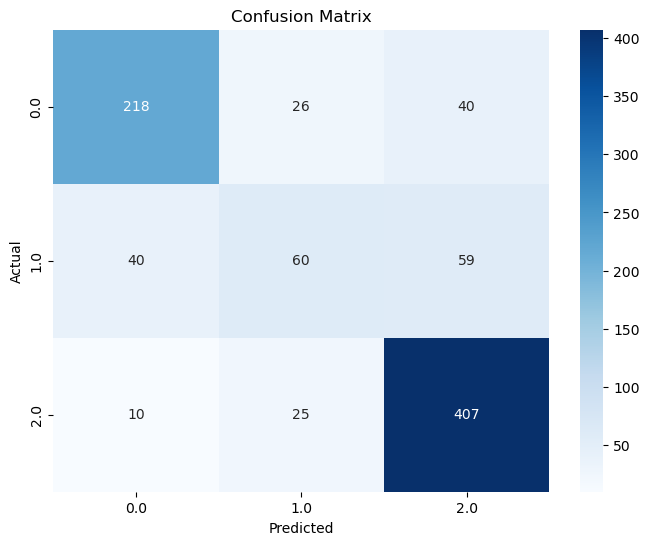

-------[C]metrics
Accuracy: 0.774
Precision (macro): 0.7194
Recall (macro): 0.6886
F1 Score (macro): 0.6976
-------[C]classification report (per class)

Detailed Classification Report:
              precision    recall  f1-score   support

         0.0       0.81      0.77      0.79       284
         1.0       0.54      0.38      0.44       159
         2.0       0.80      0.92      0.86       442

    accuracy                           0.77       885
   macro avg       0.72      0.69      0.70       885
weighted avg       0.76      0.77      0.76       885

-------[C]bar chart of metrics


C:\Users\FADHIL\AppData\Local\Temp\ipykernel_1868\947980683.py:249: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(metrics.keys()), y=list(metrics.values()), palette="viridis")


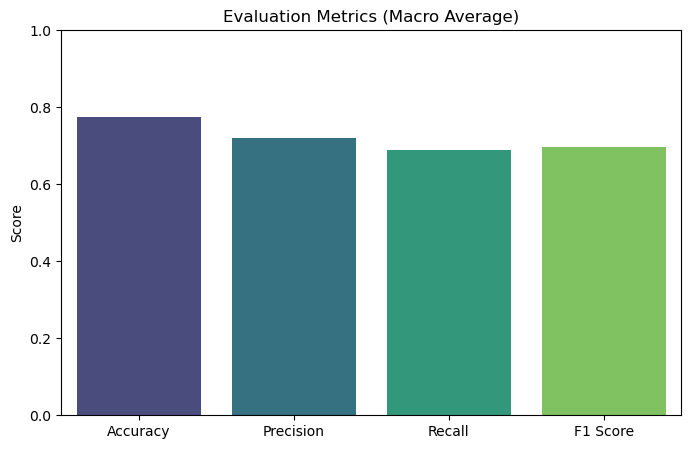

C:\Users\FADHIL\AppData\Local\Temp\ipykernel_1868\947980683.py:269: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feat_imp_df.head(15), x="Importance", y="Feature", palette="mako")


-------[C]feature importance
Top 15 Most Important Features:
                         Feature  Importance
37        performanceIndex2ndSem    0.136608
35            approvedRate2ndSem    0.101773
36        performanceIndex1stSem    0.097403
34            approvedRate1stSem    0.068665
12                admissionGrade    0.040737
16           tuitionFeesUpToDate    0.039229
19               ageAtEnrollment    0.038728
6     previousQualificationGrade    0.036237
3                         course    0.030464
24  normalizedUnemploymentByYear    0.027047
11              fatherOccupation    0.024551
22           economicStressIndex    0.022446
10              motherOccupation    0.022074
21                          year    0.020685
1                applicationMode    0.020294


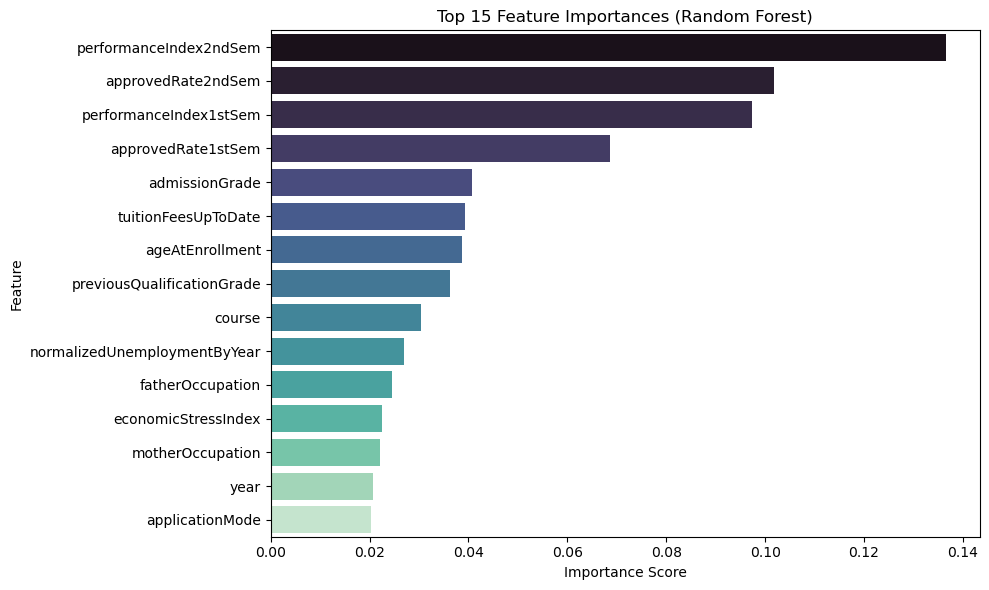


>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
>[SECTION]


In [30]:

__________section__________("load csv to df_rf")
df_rf = pd.read_csv("PredictStudentsDropoutAndAcademicSuccess.csv", sep=";")
__________section__________()




__________section__________("general check")
#check new column names
df_rf.rename(columns=conversion_dict, inplace=True)
print(df_rf.columns.tolist())

_c_("check type")
print(df_rf.dtypes[df_rf.dtypes == "object"])

nanCheck(df_rf)
__________section__________()




__________section__________("econ and year")
# Map the tuple of 3 macro features to year
df_rf["year"] = df_rf.apply(lambda row: econ_to_year.get((row["unemploymentRate"], row["inflationRate"], row["gdp"])),axis=1)

#check missing year
print("Missing year:", df_rf["year"].isnull().sum())

#EconomicStressIndex
df_rf["economicStressIndex"] = df_rf["unemploymentRate"] + df_rf["inflationRate"] - df_rf["gdp"]

#Is_Economy_Good binary flag
df_rf["isEconomyGood"] = ((df_rf["gdp"] > 1.5) & (df_rf["unemploymentRate"] < 10)).astype(int)

#normalizedUnemploymentByYear
df_rf["normalizedUnemploymentByYear"] = df_rf.groupby("year")["unemploymentRate"].transform(lambda x: (x - x.mean()) / x.std())
nanCheck(df_rf)
__________section__________()




__________section__________("target")
#check all row got target


print("Target unique:", df_rf["target"].unique())
print("Unmapped target labels:", sorted(set(df_rf["target"].dropna().astype(str).str.strip().str.title()) - set(targetMap.keys())))

#convert target to targetInt
df_rf["targetInt"] = (df_rf["target"].map(targetMap).astype("Int64"))
__________section__________()




__________section__________("parent qualification and occupation")
# create a new column based on parent qualification mapped to ordinal
df_rf["motherQualificationOrdinal"] = df_rf["motherQualification"].map(qualificationOrdinal)
df_rf["fatherQualificationOrdinal"] = df_rf["fatherQualification"].map(qualificationOrdinal)

# create a new column based on parent income mapped to ordinal
df_rf["motherOccupationOrdinal"] = df_rf["motherOccupation"].map(occupationOrdinal)
df_rf["fatherOccupationOrdinal"] = df_rf["fatherOccupation"].map(occupationOrdinal)

#average parent edu and occupation
df_rf["avgParentalEducation"] = df_rf[["motherQualificationOrdinal", "fatherQualificationOrdinal"]].mean(axis=1)
df_rf["avgParentalIncome"] = df_rf[["motherOccupationOrdinal", "fatherOccupationOrdinal"]].mean(axis=1)

#parentalDisparity
df_rf["parentalEduDisparity"] = abs(df_rf["motherQualificationOrdinal"] - df_rf["fatherQualificationOrdinal"])
df_rf["parentalIncomeDisparity"] = abs(df_rf["motherOccupationOrdinal"] - df_rf["fatherOccupationOrdinal"])
__________section__________()




__________section__________("academic activity and performance")
# Define inactive students (zero academic activity)
inactive_mask = (
    (df_rf["curricularUnits1stSemEnrolled"] == 0) &
    (df_rf["curricularUnits2ndSemEnrolled"] == 0) &
    (df_rf["curricularUnits1stSemEvaluations"] == 0) &
    (df_rf["curricularUnits2ndSemEvaluations"] == 0) &
    (df_rf["curricularUnits1stSemGrade"] == 0) &
    (df_rf["curricularUnits2ndSemGrade"] == 0)
)

# Subset those inactive students
inactive_students = df_rf[inactive_mask]

# Print how many
print(f"Fully inactive students: {len(inactive_students)}")

# Check their target label distribution
print("\nTarget label distribution for inactive students:")
print(inactive_students["target"].value_counts())

# Check other features for patterns
print("\nDescriptive stats for selected features of inactive students:")
#print(inactive_students[["applicationOrder", "applicationMode", "ageAtEnrollment", "scholarshipHolder", "international", "displaced", "motherQualification", "fatherOccupation", "year", "isEconomyGood"]].describe(include="all"))

# Add binary flag to main dataframe
df_rf["noAcademicActivity"] = inactive_mask.astype(int)

# See how 'noAcademicActivity' affects the target label
print("\nTarget distribution grouped by noAcademicActivity flag:")
#print(df_rf.groupby("noAcademicActivity")["target"].value_counts(normalize=True))

#Approved Rate
df_rf["approvedRate1stSem"] = df_rf["curricularUnits1stSemApproved"] / df_rf["curricularUnits1stSemEnrolled"].replace(0, np.nan)
df_rf["approvedRate2ndSem"] = df_rf["curricularUnits2ndSemApproved"] / df_rf["curricularUnits2ndSemEnrolled"].replace(0, np.nan)

# Performance Index
df_rf["performanceIndex1stSem"] = df_rf["approvedRate1stSem"] * df_rf["curricularUnits1stSemGrade"]
df_rf["performanceIndex2ndSem"] = df_rf["approvedRate2ndSem"] * df_rf["curricularUnits2ndSemGrade"]

#Credit Load Reduction
df_rf["creditLoadReduction1stSem"] = df_rf["curricularUnits1stSemCredited"] / df_rf["curricularUnits1stSemEnrolled"].replace(0, np.nan)
df_rf["creditLoadReduction2ndSem"] = df_rf["curricularUnits2ndSemCredited"] / df_rf["curricularUnits2ndSemEnrolled"].replace(0, np.nan)

# Evalution rate
df_rf["evalRate1stSem"] = df_rf["curricularUnits1stSemEvaluations"] / (df_rf["curricularUnits1stSemEvaluations"] + df_rf["curricularUnits1stSemWithoutEvaluations"]).replace(0, np.nan)
df_rf["evalRate2ndSem"] = df_rf["curricularUnits2ndSemEvaluations"] / (df_rf["curricularUnits2ndSemEvaluations"] + df_rf["curricularUnits2ndSemWithoutEvaluations"]).replace(0, np.nan)

#noAcademicActivity flag student
df_rf["noAcademicActivity"] = inactive_mask.astype(int)

nanCheck(df_rf)
__________section__________()




__________section__________("Application Mode")
# Application Mode shifted cause 0 is first choice unsuitable
df_rf["applicationOrderShifted"] = df_rf["applicationOrder"] + 1
__________section__________()




__________section__________("drop columnn")
df_rf = df_rf.drop("target", axis=1)

columns_to_drop = [
    "motherQualification",
    "fatherQualification",
    "motherOccupation",
    "fatherOccupation",
]
#df_rf = df_rf.drop(columns=columns_to_drop)

columns_optional = [
    "unemploymentRate",
    "inflationRate",
    "gdp",
    "curricularUnits1stSemEnrolled",
    "curricularUnits2ndSemEnrolled",
    "curricularUnits1stSemApproved",
    "curricularUnits2ndSemApproved",
    "curricularUnits1stSemGrade",
    "curricularUnits2ndSemGrade",
    "curricularUnits1stSemCredited",
    "curricularUnits2ndSemCredited",
    "curricularUnits1stSemEvaluations",
    "curricularUnits1stSemWithoutEvaluations",
    "curricularUnits2ndSemEvaluations",
    "curricularUnits2ndSemWithoutEvaluations"
]
# Drop these only if confirmed redundant
df_rf = df_rf.drop(columns=columns_optional)

#axis=1 → col, axis=0 → row 
#df_rf = df_rf.drop("colName", axis=1)
#df_rf = df_rf.drop(rowNum, axis=0)

print(df_rf.columns.tolist())
__________section__________()




__________section__________("Save snapshot")
df_rf.to_csv("student_dataset_engineered.csv", index=False)
__________section__________()




__________section__________("training")
X = df_rf.drop(columns=["targetInt"])
y = df_rf["targetInt"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

#Train the Random Forest Model
model = RandomForestClassifier(
    n_estimators=300, 
    max_depth=None, 
    random_state=42, 
    class_weight='balanced')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
__________section__________()




__________section__________("evaluate")

_c_("Confusion matrix", "magenta")
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
            xticklabels=model.classes_, 
            yticklabels=model.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


_c_("Metrics", "magenta")
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average="macro")
recall = recall_score(y_test, y_pred, average="macro")
f1 = f1_score(y_test, y_pred, average="macro")
print("Accuracy:", round(accuracy, 4))
print("Precision (macro):", round(precision, 4))
print("Recall (macro):", round(recall, 4))
print("F1 Score (macro):", round(f1, 4))


_c_("Classification Report (per class)", "magenta")
print("\nDetailed Classification Report:")
print(classification_report(y_test, y_pred))


_c_("Bar chart of metrics", "magenta")
metrics = {
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1 Score": f1
}
plt.figure(figsize=(8,5))
sns.barplot(x=list(metrics.keys()), y=list(metrics.values()), palette="viridis")
plt.ylim(0, 1.0)
plt.title("Evaluation Metrics (Macro Average)")
plt.ylabel("Score")
plt.show()

_c_("Feature Importance", "magenta")
# Get feature importances
importances = model.feature_importances_
feature_names = X.columns
# Create DataFrame for easier viewing and sorting
feat_imp_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)
# Print top 15 features
print("Top 15 Most Important Features:")
print(feat_imp_df.head(15))
# Plot top 15
plt.figure(figsize=(10, 6))
sns.barplot(data=feat_imp_df.head(15), x="Importance", y="Feature", palette="mako")
plt.title("Top 15 Feature Importances (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()
__________section__________()



# Next
[BackToTop](#PredictStudentsDropoutAndAcademicSuccess)